In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
data = pd.read_csv("/content/tips.csv")

In [3]:
data.shape

(244, 11)

In [4]:
data.head(10)

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3560325168603410,Sun2959
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4478071379779230,Sun4608
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00,Travis Walters,6011812112971322,Sun4458
3,23.68,3.31,Male,No,Sun,Dinner,2,11.84,Nathaniel Harris,4676137647685994,Sun5260
4,24.59,3.61,Female,No,Sun,Dinner,4,6.15,Tonya Carter,4832732618637221,Sun2251
5,25.29,4.71,Male,No,Sun,Dinner,4,6.32,Erik Smith,213140353657882,Sun9679
6,8.77,2.00,Male,No,Sun,Dinner,2,4.38,Kristopher Johnson,2223727524230344,Sun5985
7,26.88,3.12,Male,No,Sun,Dinner,4,6.72,Robert Buck,3514785077705092,Sun8157
8,15.04,1.96,Male,No,Sun,Dinner,2,7.52,Joseph Mcdonald,3522866365840377,Sun6820
9,14.78,3.23,Male,No,Sun,Dinner,2,7.39,Jerome Abbott,3532124519049786,Sun3775


#Exploratory Data Analysis (EDA)

**Exploratory Data Analysis (EDA)** is the process of examining and visualizing a dataset to understand its structure, patterns, and relationships before applying any machine learning models. It helps identify missing values, outliers, data inconsistencies, and correlations among variables. Through statistical summaries and graphical representations, EDA provides meaningful insights that guide data cleaning, feature selection, and model-building decisions.


In [5]:
data.isnull().sum()

,0
total_bill,0
tip,0
sex,0
smoker,0
day,0
time,0
size,0
price_per_person,0
Payer Name,0
CC Number,0


In [6]:
data.dropna(inplace=True)
data.isna().sum()

,0
total_bill,0
tip,0
sex,0
smoker,0
day,0
time,0
size,0
price_per_person,0
Payer Name,0
CC Number,0


In [7]:
data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
239,False
240,False
241,False
242,False


**Analyzing the 'time' Feature**

The objective of this step is to explore the distribution of the time feature in the dataset. By identifying unique values and their frequencies, we can understand when most transactions occur — for example, whether customers tend to visit more during lunch or dinner. This insight helps in determining if the time of day influences tipping behavior.

In [8]:
# View the unique time values
print(data['time'].unique())

# Count how many unique times there are
print("Number of unique time values:", data['time'].nunique())

# Show how many records belong to each time category
print(data['time'].value_counts())


['Dinner' 'Lunch']
Number of unique time values: 2
time
Dinner    176
Lunch      68
Name: count, dtype: int64


**Analyzing the 'day' Feature**

The goal here is to examine the day feature to see how tips vary across different days of the week. Understanding which days receive higher or lower tips can reveal customer trends and help identify patterns in restaurant performance based on the day.

In [9]:
# View the unique day values
print(data['day'].unique())

# Count how many unique days there are
print("Number of unique day values:", data['day'].nunique())

# Show how many records belong to each day category
print(data['day'].value_counts())


['Sun' 'Sat' 'Thur' 'Fri']
Number of unique day values: 4
day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64


**Relationship Between Group Size and Tip Amount**

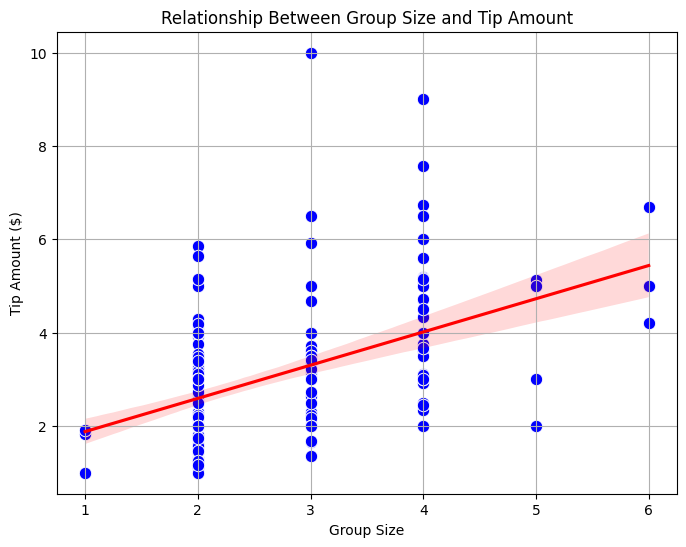

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of Size vs Tip
plt.figure(figsize=(8,6))
sns.scatterplot(x='size', y='tip', data=data, color='blue', s=80)

# Add a trend line
sns.regplot(x='size', y='tip', data=data, scatter=False, color='red')

plt.title("Relationship Between Group Size and Tip Amount")
plt.xlabel("Group Size")
plt.ylabel("Tip Amount ($)")
plt.grid(True)
plt.show()

The visualization below shows the relationship between group size and tip amount. Each point represents a dining transaction, where the x-axis indicates the number of people at the table and the y-axis shows the corresponding tip amount.
From the trend line, we can observe that tips generally increase as group size increases, indicating that larger groups tend to leave higher tips overall. However, the relationship is not perfectly linear — there are variations caused by other factors such as total bill, day, and time of dining.

## **Encode Categorical Columns**

Categorical columns contain **non-numeric values** such as strings or labels (e.g., `Male`/`Female`, `Yes`/`No`, `Lunch`/`Dinner`). Machine learning models **require numeric input**, so these columns must be converted into numbers.

**Purpose:**

* Transform categorical data into a **machine-readable format**.
* Ensure all features can be used for **model training and prediction**.
* Preserve the **relationship between categories** (e.g., Male → 1, Female → 0) for meaningful analysis.

**Example in TipPredictor:**

* `sex`: Male → 1, Female → 0
* `smoker`: Yes → 1, No → 0
* `day`: Thur → 1, Fri → 2, Sat → 3, Sun → 4
* `time`: Lunch → 1, Dinner → 2

This step ensures the dataset is fully numeric and compatible with regression models.


In [12]:
data.sex = data.sex.replace(['Male','Female'],[1,0])
data.smoker = data.smoker.replace(['Yes','No'],[1,0])
data.day = data.day.replace(['Sun', 'Sat', 'Thur', 'Fri'],[4,3,1,2])
data.time = data.time.replace(['Dinner','Lunch'],[2,1])
data.head()

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID
0,16.99,1.01,0,0,4,2,2,8.49,Christy Cunningham,3560325168603410,Sun2959
1,10.34,1.66,1,0,4,2,3,3.45,Douglas Tucker,4478071379779230,Sun4608
2,21.01,3.50,1,0,4,2,3,7.00,Travis Walters,6011812112971322,Sun4458
3,23.68,3.31,1,0,4,2,2,11.84,Nathaniel Harris,4676137647685994,Sun5260
4,24.59,3.61,0,0,4,2,4,6.15,Tonya Carter,4832732618637221,Sun2251


### **Dropping Irrelevant Columns**

After examining the dataset, it is clear that some columns, such as `Payer Name`, `CC Number`, and `Payment ID`, are **unique identifiers** and do not carry predictive information about the tip amount. Including these columns could introduce noise and negatively affect the model’s performance.

Therefore, these columns are **dropped** from the dataset before training the model:

```python
data = data.drop(['Payer Name', 'CC Number', 'Payment ID', 'price_per_person'], axis=1)
```

**Rationale:**

* `Payer Name`, `CC Number`, `Payment ID` → identifiers, irrelevant for prediction
* `price_per_person` → redundant, already represented by `total_bill` and `size`

This step ensures that the model only learns from **relevant features**, improving accuracy and interpretability.




In [14]:
data = data.drop(['Payer Name','CC Number','Payment ID','price_per_person'],axis=1)
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,4,2,2
1,10.34,1.66,1,0,4,2,3
2,21.01,3.50,1,0,4,2,3
3,23.68,3.31,1,0,4,2,2
4,24.59,3.61,0,0,4,2,4


In [15]:
data.shape

(244, 7)

## **Splitting the Data into Train and Test Sets**

Before training a machine learning model, it is important to **split the dataset** into two parts:

1. **Training Set:** Used by the model to learn patterns from the data.
2. **Test Set:** Used to evaluate the model’s performance on unseen data.

**Purpose:**

* Provides a **fair evaluation** of model performance.
* Helps to **compare different models** reliably using the same test set.
* Ensures the model can **predict tips accurately on new, unseen data**.


In [16]:
#Splitting the data into train and test

x = data.drop(['tip'],axis=1)
y = data.tip

In [17]:
# Data processing and visualization
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

# Regression models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

import lightgbm as lgbm

# Metrics for regression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [18]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# Initialize best model tracking
best_model_name = ""
best_score = -float('inf')  # For combined metric

##**Linear Regression**

A simple model that finds a straight-line relationship between the input features and the tip amount. It’s easy to interpret and provides a good baseline for comparison.

In [19]:
# Linear Regression
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

r2_lr = r2_score(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

print(f"Linear Regression:\n R²: {r2_lr:.4f}, MAE: {mae_lr:.2f}, RMSE: {rmse_lr:.2f}\n")

# Simple combined score: higher R² minus normalized errors
score_lr = r2_lr - (mae_lr / y_test.mean()) - (rmse_lr / y_test.mean())

if score_lr > best_score:
    best_score = score_lr
    best_model_name = "Linear Regression"
    best_model = model_lr

Linear Regression:
 R²: 0.4429, MAE: 0.67, RMSE: 0.83



##**Random Forest Regressor**
An ensemble model that combines many decision trees. Each tree makes a prediction, and the final result is the average of all trees — improving accuracy and reducing errors.

In [20]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print(f"Random Forest Regressor:\n R²: {r2_rf:.4f}, MAE: {mae_rf:.2f}, RMSE: {rmse_rf:.2f}\n")

score_rf = r2_rf - (mae_rf / y_test.mean()) - (rmse_rf / y_test.mean())
if score_rf > best_score:
    best_score = score_rf
    best_model_name = "Random Forest Regressor"
    best_model = model_rf


Random Forest Regressor:
 R²: 0.2481, MAE: 0.77, RMSE: 0.97



##**Gradient Boosting Regressor**
A powerful model that builds trees one after another, where each new tree tries to correct the mistakes made by the previous ones.

In [21]:
from sklearn.ensemble import GradientBoostingRegressor

model_gb = GradientBoostingRegressor(random_state=42)
model_gb.fit(X_train, y_train)
y_pred_gb = model_gb.predict(X_test)

r2_gb = r2_score(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))

print(f"Gradient Boosting Regressor:\n R²: {r2_gb:.4f}, MAE: {mae_gb:.2f}, RMSE: {rmse_gb:.2f}\n")

score_gb = r2_gb - (mae_gb / y_test.mean()) - (rmse_gb / y_test.mean())
if score_gb > best_score:
    best_score = score_gb
    best_model_name = "Gradient Boosting Regressor"
    best_model = model_gb


Gradient Boosting Regressor:
 R²: 0.3475, MAE: 0.74, RMSE: 0.90



##**XGBoost Regressor**
XGBoost is an optimized gradient boosting algorithm that improves prediction accuracy and speed through regularization, parallel processing, and efficient handling of missing values.

In [22]:
from xgboost import XGBRegressor

model_xgb = XGBRegressor(random_state=42, objective='reg:squarederror')
model_xgb.fit(X_train, y_train)
y_pred_xgb = model_xgb.predict(X_test)

r2_xgb = r2_score(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

print(f"XGBoost Regressor:\n R²: {r2_xgb:.4f}, MAE: {mae_xgb:.2f}, RMSE: {rmse_xgb:.2f}\n")

score_xgb = r2_xgb - (mae_xgb / y_test.mean()) - (rmse_xgb / y_test.mean())
if score_xgb > best_score:
    best_score = score_xgb
    best_model_name = "XGBoost Regressor"
    best_model = model_xgb


XGBoost Regressor:
 R²: 0.1808, MAE: 0.73, RMSE: 1.01



##**CatBoost Regressor**

CatBoost is a gradient boosting algorithm designed to handle categorical features efficiently, requiring minimal preprocessing and often achieving high accuracy with default settings.

In [23]:
# Install CatBoost if not installed
!pip install catboost



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.4 MB/s eta 0:00:00


In [24]:
from catboost import CatBoostRegressor

model_cat = CatBoostRegressor(verbose=0, random_state=42)
model_cat.fit(X_train, y_train)
y_pred_cat = model_cat.predict(X_test)

r2_cat = r2_score(y_test, y_pred_cat)
mae_cat = mean_absolute_error(y_test, y_pred_cat)
rmse_cat = np.sqrt(mean_squared_error(y_test, y_pred_cat))

print(f"CatBoost Regressor:\n R²: {r2_cat:.4f}, MAE: {mae_cat:.2f}, RMSE: {rmse_cat:.2f}\n")

score_cat = r2_cat - (mae_cat / y_test.mean()) - (rmse_cat / y_test.mean())
if score_cat > best_score:
    best_score = score_cat
    best_model_name = "CatBoost Regressor"
    best_model = model_cat

CatBoost Regressor:
 R²: 0.3942, MAE: 0.69, RMSE: 0.87



### **LightGBM Regressor**

LightGBM is a gradient boosting framework that uses **tree-based learning** optimized for speed and efficiency. It handles large datasets with low memory usage, supports categorical features, and often achieves high accuracy with faster training compared to traditional gradient boosting methods.


In [25]:
import lightgbm as lgbm

model_lgb = lgbm.LGBMRegressor(random_state=42)
model_lgb.fit(X_train, y_train)
y_pred_lgb = model_lgb.predict(X_test)

r2_lgb = r2_score(y_test, y_pred_lgb)
mae_lgb = mean_absolute_error(y_test, y_pred_lgb)
rmse_lgb = np.sqrt(mean_squared_error(y_test, y_pred_lgb))

print(f"LightGBM Regressor:\n R²: {r2_lgb:.4f}, MAE: {mae_lgb:.2f}, RMSE: {rmse_lgb:.2f}\n")

score_lgb = r2_lgb - (mae_lgb / y_test.mean()) - (rmse_lgb / y_test.mean())
if score_lgb > best_score:
    best_score = score_lgb
    best_model_name = "LightGBM Regressor"
    best_model = model_lgb


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000435 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 84
[LightGBM] [Info] Number of data points in the train set: 195, number of used features: 6
[LightGBM] [Info] Start training from score 3.087795
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

##**Best Model Selection**

In [26]:
print(f"✅ Best Model based on R², MAE, and RMSE: {best_model_name} (Combined Score = {best_score:.4f})")


✅ Best Model based on R², MAE, and RMSE: Linear Regression (Combined Score = -0.1259)


**Best Model:** Linear Regression
**Combined Score:** -0.1259

### **Key Results:**

* **R²:** 0.4429
* **MAE:** 0.67
* **RMSE:** 0.83

Based on these results and after comparing all models, **Linear Regression** is selected as the best model.


## **Model Evaluation and Visualization**


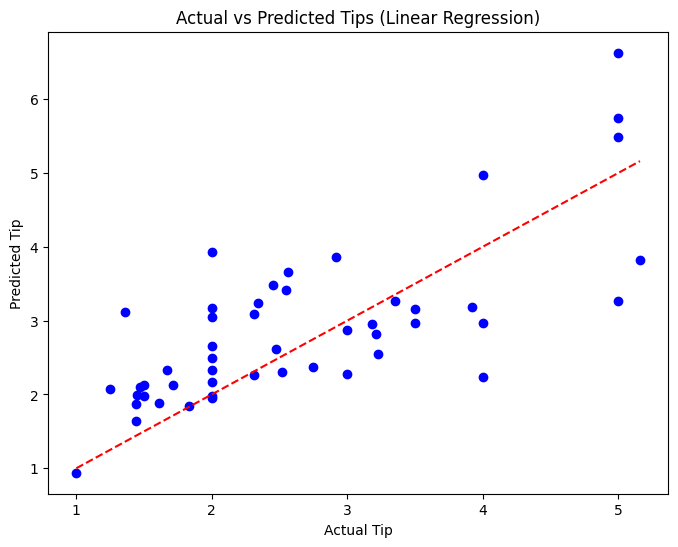

In [27]:
import matplotlib.pyplot as plt

# Predict using best model
y_pred = best_model.predict(X_test)

# Actual vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # 45-degree line
plt.xlabel("Actual Tip")
plt.ylabel("Predicted Tip")
plt.title(f"Actual vs Predicted Tips ({best_model_name})")
plt.show()


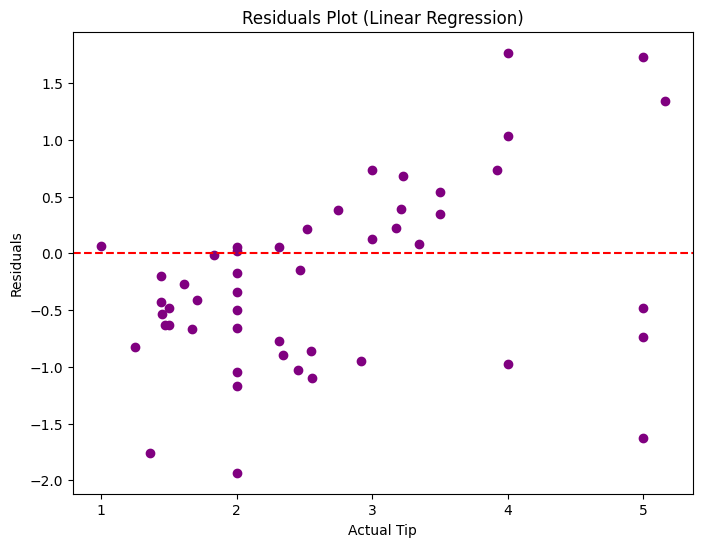

In [28]:
# Residuals
residuals = y_test - y_pred

plt.figure(figsize=(8,6))
plt.scatter(y_test, residuals, color='purple')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Actual Tip")
plt.ylabel("Residuals")
plt.title(f"Residuals Plot ({best_model_name})")
plt.show()


## Save Model

In [29]:
import joblib

# Save the best model
joblib.dump(best_model, "best_model.pkl")

# Print the best model and its accuracy (or score)
print(f"✅ Best Model: {best_model_name} with Combined Score: {best_score:.4f}")


✅ Best Model: Linear Regression with Combined Score: -0.1259


## **Tip Prediction Using User Input**


In [30]:
import joblib
import numpy as np

# Load the best saved model
best_model = joblib.load("/content/best_model.pkl")

# Define feature names
feature_names = ["total_bill", "sex", "smoker", "day", "time", "size"]

# Collect user inputs from the command line
user_data = []
for feature in feature_names:
    value = input(f"Enter {feature}: ")
    user_data.append(float(value))  # Convert input to float

# Convert input to numpy array
user_input = np.array([user_data])

# Make prediction
predicted_tip = best_model.predict(user_input)

print(f"✅ Predicted Tip Amount: ${predicted_tip[0]:.2f}")


Enter total_bill: 18.65
Enter sex: 0
Enter smoker: 0
Enter day: 4
Enter time: 1
Enter size: 2
✅ Predicted Tip Amount: $3.08
